# Project 2: Titanic Analysis

### Question:
What factors, such as age, class, and gender, made passengers more likely to survive the sinking of the titanic?

In [5]:
import numpy as np
import pandas as pd
import unicodecsv
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import seaborn as sns
%matplotlib inline

filename = '/Users/Cass/Desktop/Titanic_Analysis/titanic_data.csv'
titanic_df = pd.read_csv(filename)

### Data Wrangling:

In [7]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
# handle missing values by deleting unnecessary columns
titanic_df.drop(['Cabin','Ticket','Name','PassengerId','SibSp','Parch'], axis=1, inplace=True)

# delete passengers with missing data
titanic_df.dropna(axis=0, inplace=True)

titanic_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


The first step to clean up the data was to get rid of any data points with missing data. I did this by first dropping the columns for 'Ticket' and 'Cabin' because they contained the most missing data and I didn't think they were necessary for the analysis. I also dropped other data points (Name', 'PassengerId', 'SibSp' - siblings/spouse onboard, 'Parch' - parents/children onboard) that I did not plan to use in my analysis in order to make my data cleaner. Then, I dropped all of the rows (passengers) that had missing data. Several passengers were missing age information, and since my plan was to analyze how 
**age**, class, and gender affected survival rate, I thought it was best to remove those passengers altogether.

### Investigation:
First, I will use the built-in describe function for pandas dataframes to get an overview of the data.

In [12]:
# describe numerical data
titanic_df.describe()

,Survived,Pclass,Age,Fare
count,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,34.567251
std,0.491139,0.836854,14.492933,52.938648
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,1.000000,20.000000,8.050000
50%,0.000000,2.000000,28.000000,15.645850
75%,1.000000,3.000000,38.000000,33.000000
max,1.000000,3.000000,80.000000,512.329200


The average age was about 29 and the average fare was $32.

Now I want to use the built-in pandas function .corr to investigate correlation between variables.

In [146]:
titanic_df.corr()

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.356462,-0.082446,0.266100
Pclass,-0.356462,1.000000,-0.365902,-0.552893
Age,-0.082446,-0.365902,1.000000,0.093143
Fare,0.266100,-0.552893,0.093143,1.000000


The table above shows Pearson's r for each set of variables. The greatest correlation appears to be between fare and class. This is expected, as a 1st class ticket should cost more than a 3rd class ticket. However, I care more about the relationship between survival and class/age.

I want to start by exploring potential correlation between survival and age. I'll begin by creating bar graphs to visualize survival and age separately.

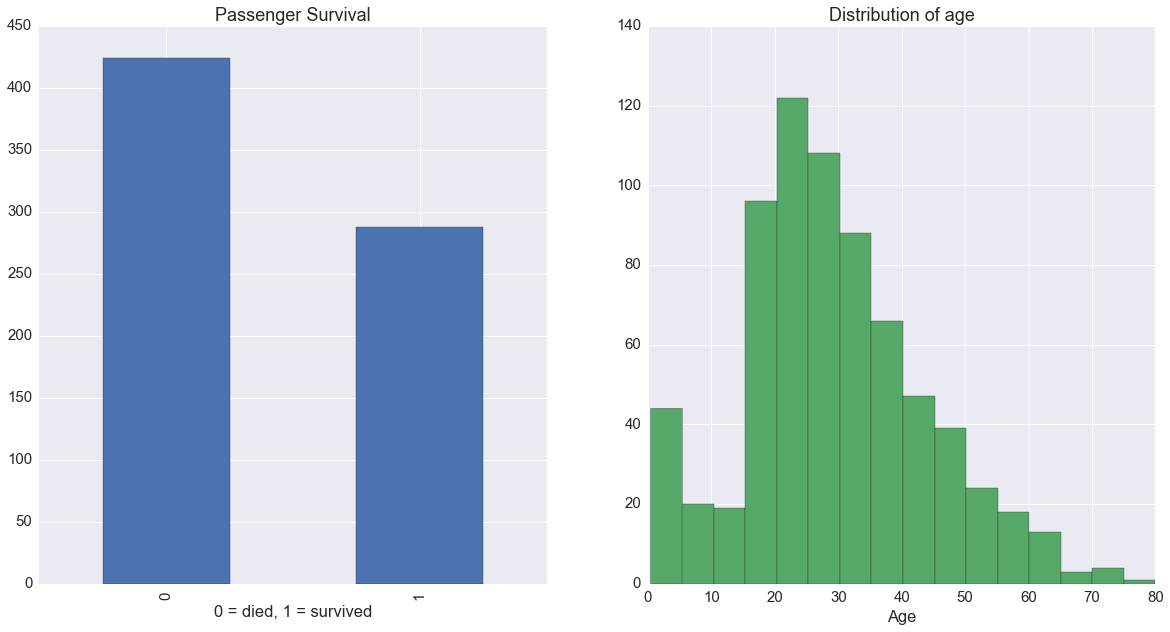

In [75]:
f, ax = plt.subplots(figsize=(20,10))
sns.set(color_codes=True, font_scale=1.5)

ax1 = plt.subplot(121)
titanic_df.Survived.value_counts().plot(kind='bar',ax=ax1)
plt.xlabel('0 = died, 1 = survived')
plt.title('Passenger Survival')

ax2 = plt.subplot(122)
titanic_df.Age.hist(bins=16, ax=ax2, color="g")
plt.xlabel('Age')
plt.title('Distribution of age')

Now I want to explore the impact of age on survival. 

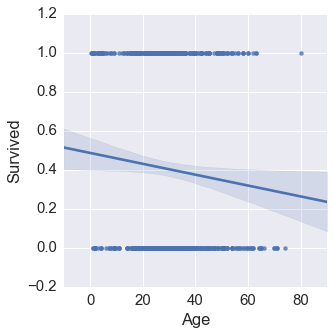

In [154]:
sns.lmplot('Age', 'Survived', data=titanic_df)

I can see a downward trend. As age increases, survival seems to decrease.

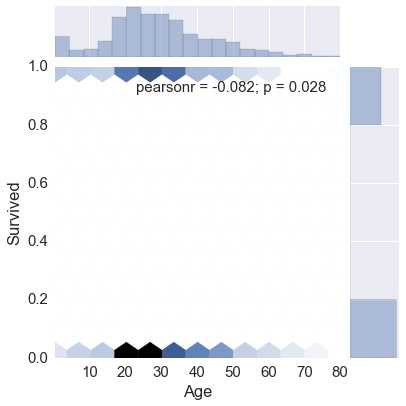

In [160]:
sns.jointplot(x="Age", y="Survived", kind="hex", data=titanic_df)

This graph shows that the greatest density of survivors **and** non-survivors are in the 20-30 age range. This is also the age range of most of the passengers. However, according to Pearson's r, there is a weak negative correlation between age and survival, meaning that as age decreases, the survival rate increases slightly. The p-value suggests that there is a significant correlation between survival and age at alpha level 0.05.

Now let's take a look at the survival rate for each age range.

In [137]:
# calculates the survival rate (percentage of passengers who survived the sinking) for a given age range
def get_survival_by_age_range(lower_bound, upper_bound):
    age_group = titanic_df[titanic_df['Age']<upper_bound][(titanic_df['Age']>=lower_bound)]
    return (float(age_group['Survived'].sum())/len(age_group)) * 100
 
# calculate the survival rate for each age group and round to 2 decimal places
print 'Survival Rate for children under 10 = %s percent' % round(get_survival_by_age_range(0,10),2)
print 'Survival Rate for ages 10 - 20 = %s percent' % round(get_survival_by_age_range(10,20),2)
print 'Survival Rate for ages 20 - 30 = %s percent' % round(get_survival_by_age_range(20,30),2)
print 'Survival Rate for ages 30 - 40 = %s percent' % round(get_survival_by_age_range(30,40),2)
print 'Survival Rate for ages 40 - 50 = %s percent' % round(get_survival_by_age_range(40,50),2)
print 'Survival Rate for ages 50 - 60 = %s percent' % round(get_survival_by_age_range(50,60),2)
print 'Survival Rate for ages 60 - 70 = %s percent' % round(get_survival_by_age_range(60,70),2)
print 'Survival Rate for ages over 70 = %s percent' % round(get_survival_by_age_range(70,100),2)

Survival Rate for children under 10 = 61.29 percent
Survival Rate for ages 10 - 20 = 40.2 percent
Survival Rate for ages 20 - 30 = 35.0 percent
Survival Rate for ages 30 - 40 = 43.37 percent
Survival Rate for ages 40 - 50 = 38.2 percent
Survival Rate for ages 50 - 60 = 41.67 percent
Survival Rate for ages 60 - 70 = 27.78 percent
Survival Rate for ages over 70 = 14.29 percent


/Users/Cass/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


It seems clear that age had an impact on survival rate. The lowest survival rate was for the elderly (over 70 years old) and the highest survival rate was for young children (under 10 years old). Still, it is tragic that only 61 percent of young children survived the sinking.

Next I will explore the possible correlation between survival and gender. I'll start by creating a bar graph to visualize the relationship

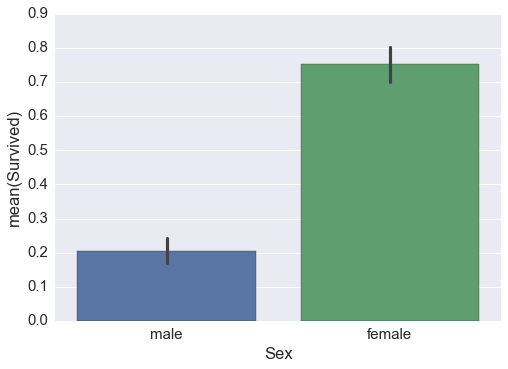

In [156]:
sns.barplot(x="Sex", y='Survived', data=titanic_df)

In [157]:
# group survivors by gender and count survivors
print titanic_df.groupby('Sex')['Survived'].sum()

# calculate percent of survivors per gender
print (titanic_df.groupby('Sex')['Survived'].sum()/titanic_df['Survived'].sum()) * 100

Sex
female    195
male       93
Name: Survived, dtype: int64
Sex
female    67.708333
male      32.291667
Name: Survived, dtype: float64


It appears gender also had an impact on survival. 195 females and only 93 males survived. 68% of the survivors were female and 32% were male. 

The last variable I want to explore is passenger class. Recall that Pearson's r for class and survival was approximately -0.36. To visualize this, I'll create a bar graph to show survival rates for each class. 

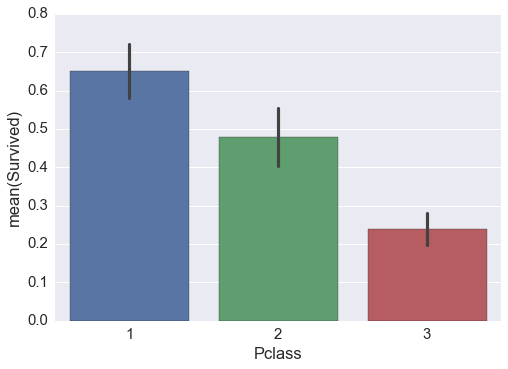

In [158]:
sns.barplot(x="Pclass", y='Survived', data=titanic_df)

Most of the passengers in first class survived, and most of the 3rd class passengers died. 

In [153]:
from scipy.stats import pearsonr

pearsonr(titanic_df['Pclass'], titanic_df['Survived'])

(-0.35646158844523823, 9.3036197426767614e-23)

The first value is Pearson's r, and the second value is the p-value. The p-value is less than .0001, which means that the correlation is extremely statistically significant. As the numerical class decreases, survival increases.

### Conclusions:

Correlations exist between:
* age and survival
* class and survival

There also seems to be a connection between gender and survival rate. Women had higher survival rates than men. However, these correlations do not imply causation.

### Sources:
* http://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe
* http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.dropna.html
* http://matplotlib.org/users/pyplot_tutorial.html
* https://web.stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html#styling-figures-with-axes-style-and-set-style
* http://www.python-course.eu/matplotlib_multiple_figures.php
* http://stackoverflow.com/questions/4450592/string-interpolation-in-python
* http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf
* http://stackoverflow.com/questions/25571882/pandas-columns-correlation-with-statistical-significance